In [41]:
#importuje biblioteki
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [42]:
#otwieram pliki
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [43]:
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP   
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False  \
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name   
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy  \
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [44]:
#sprawdzam rozmiar plikow
train.shape

(8693, 14)

In [45]:
test.shape

(4277, 13)

In [46]:
train.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa   
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000  \
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000

In [47]:
test.describe()

Age   RoomService     FoodCourt  ShoppingMall           Spa   
count  4186.000000   4195.000000   4171.000000   4179.000000   4176.000000  \
mean     28.658146    219.266269    439.484296    177.295525    303.052443   
std      14.179072    607.011289   1527.663045    560.821123   1117.186015   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      26.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     53.000000     78.000000     33.000000     50.000000   
max      79.000000  11567.000000  25273.000000   8292.000000  19844.000000   

             VRDeck  
count   4197.000000  
mean     310.710031  
std     1246.994742  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       36.000000  
max    22272.000000

In [48]:
#brakujÄ…ce wartosci
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [49]:
test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

<Axes: >

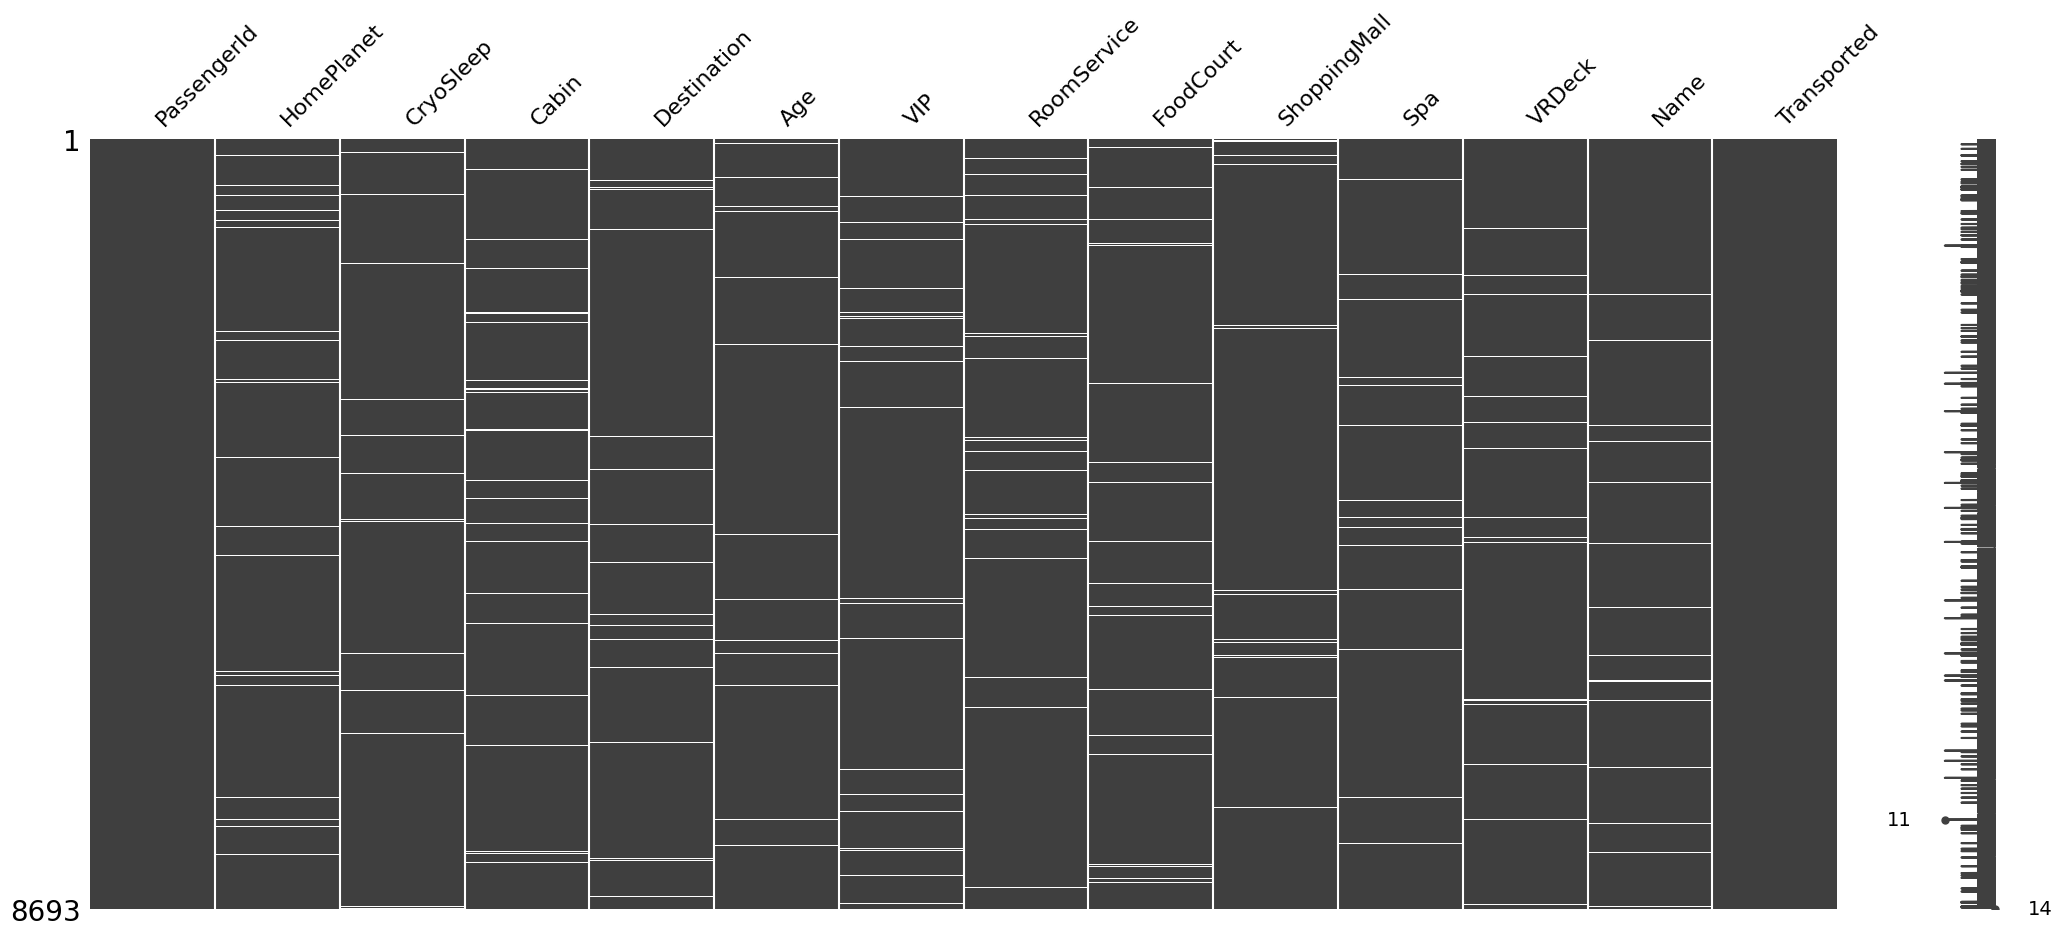

In [50]:
import missingno as msno
msno.matrix(train)

<Axes: >

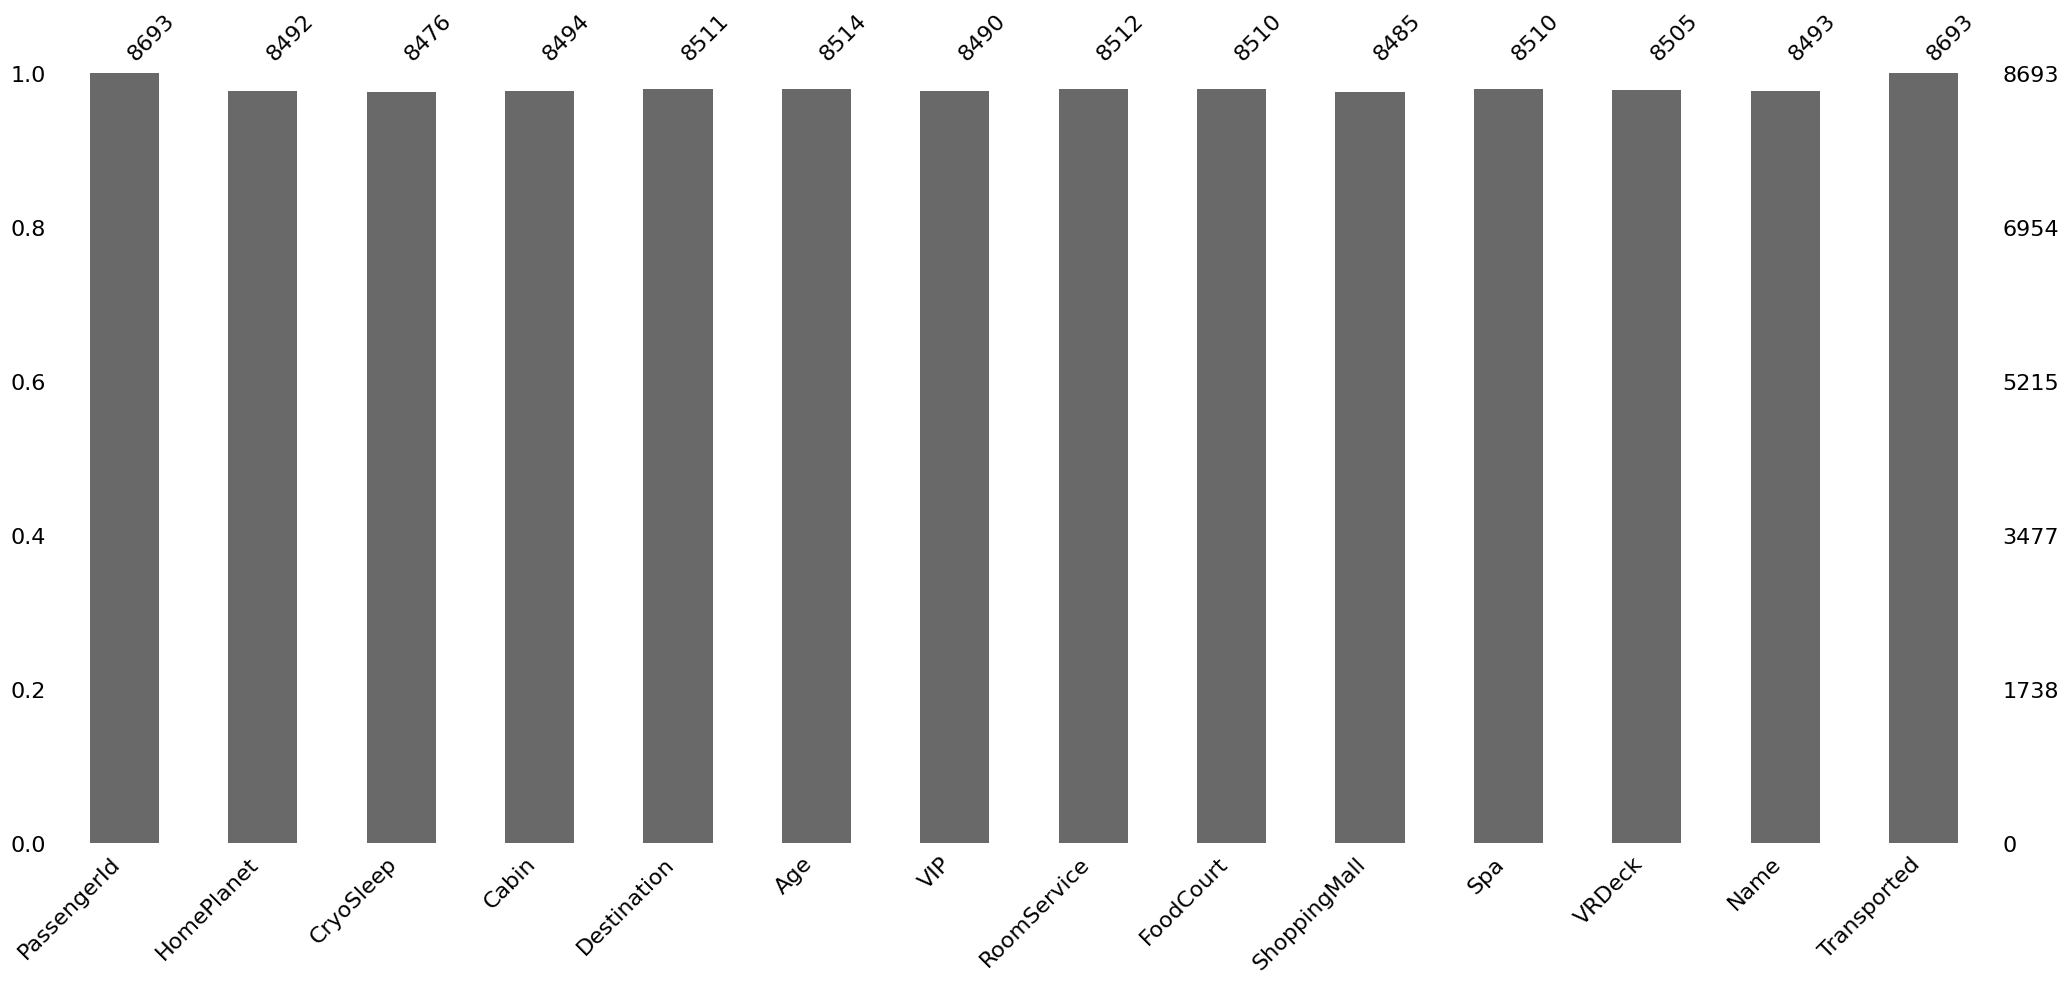

In [51]:
msno.bar(train)

In [52]:
train.set_index('PassengerId', inplace=True)
test.set_index('PassengerId', inplace=True)

In [53]:
#uzupelnienie brakujacych wartosci
train['Age']=train['Age'].fillna(train['Age'].median())
test['Age']=test['Age'].fillna(test['Age'].median())

In [54]:
train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]=train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)
test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]=test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)

In [55]:
train['Cabin']=train['Cabin'].fillna('T/0/P')
test['Cabin']=test['Cabin'].fillna('T/0/P')

In [56]:
train['VIP']=train['VIP'].fillna(False)
test['VIP']=test['VIP'].fillna(False)

In [57]:
train['CryoSleep']=train['CryoSleep'].fillna(False)
test['CryoSleep']=test['CryoSleep'].fillna(False)

In [58]:
train['HomePlanet']=train['HomePlanet'].fillna('Mars')
test['HomePlanet']=test['HomePlanet'].fillna('Mars')

In [59]:
train['Destination']=train['Destination'].fillna('PSO J318.5-22')
test['Destination']=test['Destination'].fillna('PSO J318.5-22')

In [61]:
#rozdzielenie kolumny kabiny
train[['Deck', 'Num', 'Side']]=train.Cabin.str.split('/', expand=True)
test[['Deck', 'Num', 'Side']]=test.Cabin.str.split('/', expand=True)

In [62]:
train['Spent']=train['RoomService']+train['FoodCourt']+train['ShoppingMall']+train['Spa']+train['VRDeck']
test['Spent']=test['RoomService']+test['FoodCourt']+test['ShoppingMall']+train['Spa']+train['VRDeck']

In [63]:
train['GroupAge']=0
for i in range(6):
    train.loc[(train.Age>=10*i) & (train.Age<10*(i+1)), 'GroupAge']=1
    
test['GroupAge']=0
for i in range(6):
    test.loc[(test.Age>=10*i) & (test.Age<10*(i+1)), 'GroupAge']=1

In [64]:
# przeksztalcenie danych typu string na  int (liczby calkowite)
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side', 'Num']
label_encoders = {col: LabelEncoder().fit(np.concatenate((train[col], test[col])).astype(str)) for col in categorical_cols}

train[categorical_cols] = train[categorical_cols].apply(lambda x: label_encoders[x.name].transform(x.astype(str)))
test[categorical_cols] = test[categorical_cols].apply(lambda x: label_encoders[x.name].transform(x.astype(str)))

In [65]:
train=train.drop(['Cabin', 'Name'], axis=1)
test=test.drop(['Cabin', 'Name'], axis=1)

In [66]:
train['Transported']=train['Transported'].replace({True:1, False:0})

In [67]:
X=train.drop('Transported', axis=1)
y=train['Transported']

In [68]:
X.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'Num', 'Side',
       'Spent', 'GroupAge'],
      dtype='object')

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [70]:
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.25, random_state=0)

In [71]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=0)

decision_tree_model.fit(X_train, y_train)

y_pred_tree = decision_tree_model.predict(X_val)

accuracy_tree = accuracy_score(y_val, y_pred_tree)
print("Accuracy of Decision Tree Classifier:", accuracy_tree)


Accuracy of Decision Tree Classifier: 0.7493100275988961


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logistic_model = LogisticRegression(random_state=0)

logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_val)

accuracy_logistic = accuracy_score(y_val, y_pred_logistic)
print("Accuracy of Logistic Regression:", accuracy_logistic)


Accuracy of Logistic Regression: 0.7897884084636615
